Steps

- Import and preprocess the historical data, which must contain a sufficient number of values to ensure a decent backtest and evaluation
- Perform a train-test split, which splits the data into two parts
    - The first part is for training the algorithm
    - The second part is for testing the algorithm's performance on data it has never seen before
- Fit (train) and predict (test) the data using the algorithm
- Run a performance evaluation algorithm to understand the model's performance in the past

In [1]:
# Import Relevant Python modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from master_function import data_preprocessing, mass_import 
from master_function import plot_train_test_values
from master_function import calculate_accuracy, model_bias
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor

In [2]:
data = np.diff(mass_import(0,'H1')[:,3])

num_lags = 500
train_test_split = 0.8

In [3]:
def data_preprocessing(data, num_lags, train_test_split):

    x = []
    y = []

    for i in range(len(data) - num_lags):

        x.append(data[i:i + num_lags])
        y.append(data[i + num_lags])

    x = np.array(x)
    y = np.array(y)

    split_index = int(train_test_split * len(x))
    x_train = x[:split_index]
    y_train = y[:split_index]

    x_test = x[split_index:]
    y_test = y[split_index:]

    return x_train, y_train, x_test, y_test

In [4]:
x_train , y_train, x_test, y_test = data_preprocessing(data, num_lags, train_test_split)

model = DummyRegressor(strategy = 'mean')
model.fit(x_train, y_train)

DummyRegressor()

In [5]:
y_predicted_train = np.reshape(model.predict(x_train), (-1,1))
y_predicted = np.reshape(model.predict(x_test), (-1,1))

y_train.mean() == y_predicted[123]

array([ True])

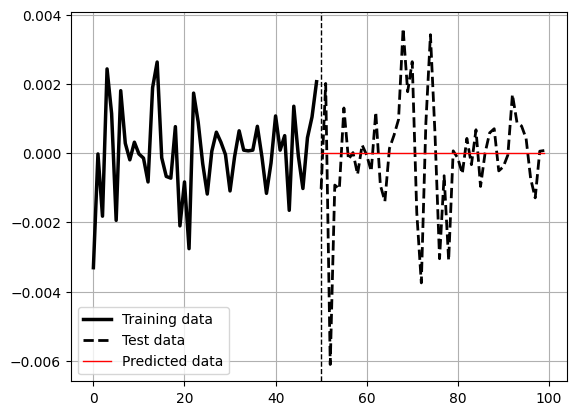

In [6]:
plot_train_test_values(100,50,y_train, y_test, y_predicted)